In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df = df.loc[df['행정구'] == '강북구'].reset_index(drop = True)
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,55.0,1116,1747,5790,7569,3773,3298,23293,3,0
1,강북구,미아동,7,5,0,3,3,25,0,0,...,50.0,675,1269,6722,6508,3500,3094,21768,1,0
2,강북구,송중동,24,12,0,4,0,25,1,1,...,53.0,1450,1948,8281,9566,4708,4051,30004,1,0
3,강북구,송천동,9,9,0,1,1,22,0,0,...,56.0,908,1437,6505,8384,4694,4179,26107,0,0
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,51.0,2505,3863,6628,11270,3557,3085,30908,0,0
5,강북구,번1동,6,7,0,2,1,15,0,1,...,49.0,592,995,6005,5809,2735,2548,18684,0,0
6,강북구,번2동,2,0,0,0,0,6,0,0,...,55.0,537,912,3756,4790,2676,2859,15530,0,0
7,강북구,번3동,2,2,0,0,2,7,0,0,...,50.0,769,1166,3337,5092,2661,3505,16530,0,0
8,강북구,수유1동,8,1,1,2,0,12,0,0,...,55.0,832,1266,5829,6304,3354,3058,20643,1,0
9,강북구,수유2동,9,7,3,0,3,24,0,1,...,54.0,936,1318,5311,6548,3517,3465,21095,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             13 non-null     object 
 1   행정동             13 non-null     object 
 2   갈비/삼겹살          13 non-null     int64  
 3   곱창/양구이전문        13 non-null     int64  
 4   기사식당            13 non-null     int64  
 5   기타고기요리          13 non-null     int64  
 6   냉면집             13 non-null     int64  
 7   닭/오리요리          13 non-null     int64  
 8   돌솥/비빕밥전문점       13 non-null     int64  
 9   두부요리전문          13 non-null     int64  
 10  버섯전문점           13 non-null     int64  
 11  별식/퓨전요리         13 non-null     int64  
 12  보리밥전문           13 non-null     int64  
 13  부대찌개/섞어찌개       13 non-null     int64  
 14  부페              13 non-null     int64  
 15  분식              13 non-null     int64  
 16  설렁탕집            13 non-null     int64  
 17  순두부전문           13 non-null     int64

- 총 72개의 컬럼
- 강북구의 경우 13개의 행정동 -> 각 컬럼마다 **13개**의 데이터가 존재해야 한다.
- 결측치 존재 x

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

**✔ df.corr() 적용 시 NaN**
- 피어쓴 상관계수 계산 식은 아래와 같음
- 따라서, 모든 행의 데이터 값이 동일한 경우 표준편차가 0이 되어 분모가 0으로 계산된다. 
    - 이로 인해, 원본 데이터에 결측치가 없어도 NaN이 발생될 수 있다.

![corr](pearson.jpg)

In [5]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,상관계수,변수,업종


In [6]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [7]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 강북구**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [8]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,162047.5300,66595.46043,85042.06494,554171.1301,37564.58578,51867.79005,136052.8726,174260.2015,68532.57880,85893.09993
1,강북구,미아동,7,5,0,3,3,25,0,0,...,171742.1654,74127.91500,78011.37843,558841.5631,20662.61209,36369.00600,182854.6916,169585.3088,73057.69351,76312.24859
2,강북구,송중동,24,12,0,4,0,25,1,1,...,261094.2873,103383.61750,117348.59040,855706.3317,51895.38195,70183.98890,239689.3104,270966.7816,104893.33070,118077.53780
3,강북구,송천동,9,9,0,1,1,22,0,0,...,203803.7707,83579.90201,96180.37130,643816.0038,37611.56335,53457.64515,158831.4772,211954.7748,84608.85378,97351.68796
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,164608.5768,49703.82080,62694.15411,535564.0724,61133.66225,69657.22393,109235.9696,181983.4337,50475.97838,63077.80289


In [9]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.766536,0.635350,-0.250082,0.531678,-0.012541,0.445810,0.471920,0.141481,NaN,0.504048,...,0.490828,0.873295,0.705116,0.652374,-0.159951,0.588535,0.635667,0.060500,0.229218,0.103350
10대 미만 생활인구_평일,0.264306,0.045060,-0.203211,-0.187814,-0.470412,-0.273361,-0.052210,-0.044787,NaN,-0.103061,...,-0.186381,0.136981,0.039163,-0.061774,-0.123852,0.092911,-0.034687,0.009004,-0.334888,-0.260800
10대 생활인구_평일,0.458632,0.283991,-0.252224,0.079640,-0.356337,0.020257,0.059530,0.013382,NaN,0.138680,...,0.092943,0.422036,0.287166,0.136091,-0.051067,0.328675,0.157050,0.030194,-0.154263,-0.051471
20~30대 생활인구_평일,0.769183,0.710387,-0.231835,0.816274,0.263167,0.674636,0.701425,0.172696,NaN,0.712914,...,0.734868,0.981482,0.853684,0.871973,-0.170557,0.652383,0.826299,-0.016928,0.509454,0.276577
40~50대 생활인구_평일,0.763178,0.668254,-0.250160,0.520401,-0.004192,0.447569,0.471649,0.167479,NaN,0.521841,...,0.506573,0.865727,0.713636,0.640466,-0.170948,0.611002,0.627476,0.073714,0.237458,0.080764
60대 생활인구_평일,0.783845,0.666655,-0.173285,0.520999,0.038643,0.519101,0.407488,0.165877,NaN,0.490413,...,0.496513,0.896644,0.706354,0.672165,-0.099468,0.590847,0.654681,0.149016,0.248168,0.153759
70대 이상 생활인구_평일,0.680126,0.504560,-0.157490,0.310990,-0.089407,0.319054,0.276974,0.103115,NaN,0.266849,...,0.250764,0.736785,0.526104,0.502796,-0.129433,0.426192,0.498810,0.152893,0.054944,0.005639
총생활인구수_주말,0.780263,0.612721,-0.237446,0.540544,-0.039574,0.461564,0.495591,0.131027,NaN,0.506367,...,0.470989,0.859818,0.667958,0.673970,-0.170880,0.544531,0.671666,0.068040,0.225170,0.044538
10대 미만 생활인구_주말,0.343725,0.112711,-0.176393,-0.062489,-0.388508,-0.145097,0.101387,-0.019647,NaN,0.008808,...,-0.100604,0.221199,0.088464,0.054944,-0.195399,0.116158,0.096614,-0.058825,-0.270200,-0.281072
10대 생활인구_주말,0.479304,0.291219,-0.229182,0.141656,-0.311614,0.069374,0.196002,0.032082,NaN,0.186119,...,0.097672,0.438208,0.281023,0.201672,-0.167704,0.297689,0.239088,-0.049110,-0.140214,-0.144113


In [10]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_주말,0.787463
1,갈비/삼겹살,60대 생활인구_평일,0.783845
2,갈비/삼겹살,총생활인구수_주말,0.780263
3,갈비/삼겹살,60대 생활인구_주말,0.778857
4,갈비/삼겹살,20~30대 생활인구_평일,0.769183
...,...,...,...
216,한식/백반/한정식,70대 이상 생활인구_평일,0.498810
217,한식/백반/한정식,70대 이상 생활인구_주말,0.476582
218,해장국/감자탕,20~30대 생활인구_평일,0.509454
219,해장국/감자탕,20~30대 생활인구_주말,0.491774


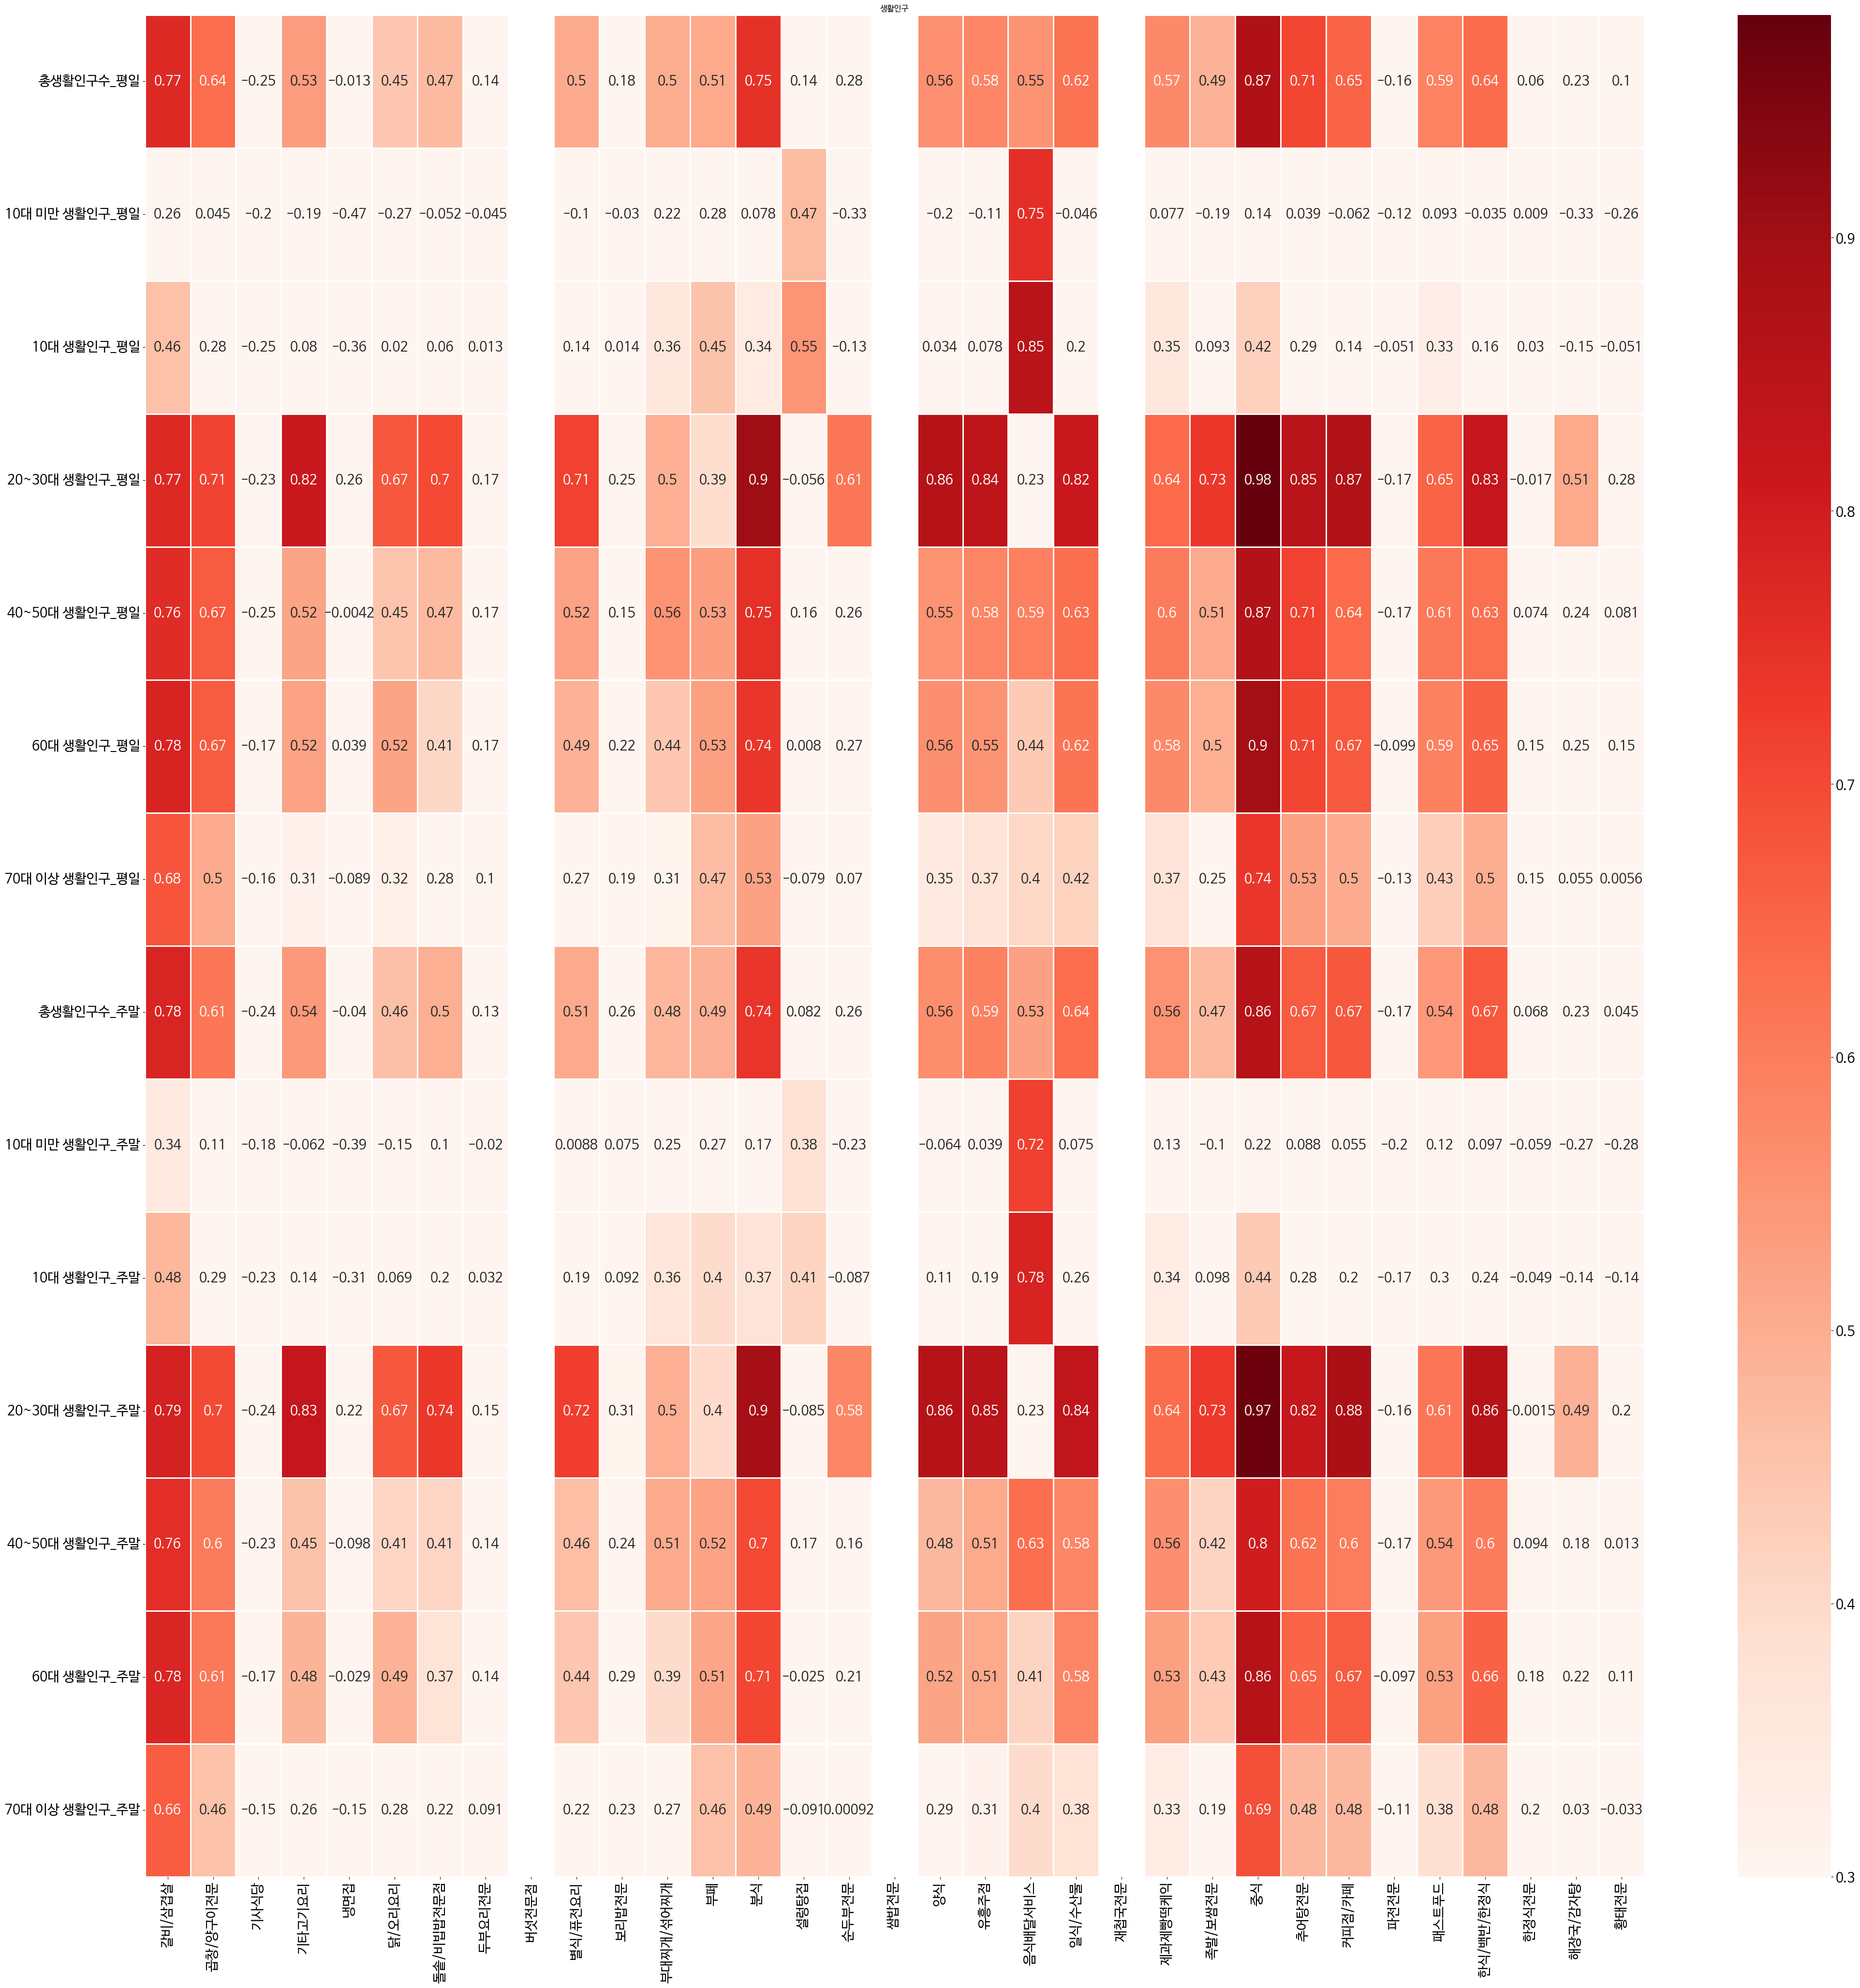

In [11]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [12]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살       13
곱창/양구이전문     10
기타고기요리        9
냉면집           4
닭/오리요리        9
돌솥/비빕밥전문점     8
별식/퓨전요리       8
보리밥전문         1
부대찌개/섞어찌개    11
부페           12
분식           12
설렁탕집          4
순두부전문         3
양식            9
유흥주점         10
음식배달서비스      12
일식/수산물       10
제과제빵떡케익      12
족발/보쌈전문       8
중식           12
추어탕전문        10
커피점/카페       10
패스트푸드        11
한식/백반/한정식    10
해장국/감자탕       3
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **b) 대학정보**

In [13]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,10,1,9,32,0,0,0,0,0,0
1,강북구,미아동,7,5,0,3,3,25,0,0,...,39,0,16,76,0,5,1,1,0,1
2,강북구,송중동,24,12,0,4,0,25,1,1,...,51,0,27,124,0,5,0,0,0,0
3,강북구,송천동,9,9,0,1,1,22,0,0,...,34,1,13,108,2,3,0,0,0,0
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,13,0,8,28,0,1,0,0,0,0


In [14]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),-0.043405,0.05111,-0.108148,0.213167,0.465475,0.285707,-0.108148,-0.158114,NaN,0.062536,...,0.209057,0.319207,0.324557,0.173675,-0.123091,0.1774,0.009464,-0.210042,0.268742,1.0
일반대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
온라인대학,-0.043405,0.05111,-0.108148,0.213167,0.465475,0.285707,-0.108148,-0.158114,NaN,0.062536,...,0.209057,0.319207,0.324557,0.173675,-0.123091,0.1774,0.009464,-0.210042,0.268742,1.0


In [15]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_univ = selection(univ_corr)
result_univ.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,냉면집,대학교(전체),0.465475
1,냉면집,온라인대학,0.465475
2,순두부전문,대학교(전체),0.677003
3,순두부전문,온라인대학,0.677003
4,중식,대학교(전체),0.319207
5,중식,온라인대학,0.319207
6,추어탕전문,대학교(전체),0.324557
7,추어탕전문,온라인대학,0.324557
8,황태전문,대학교(전체),1.000000
9,황태전문,온라인대학,1.000000


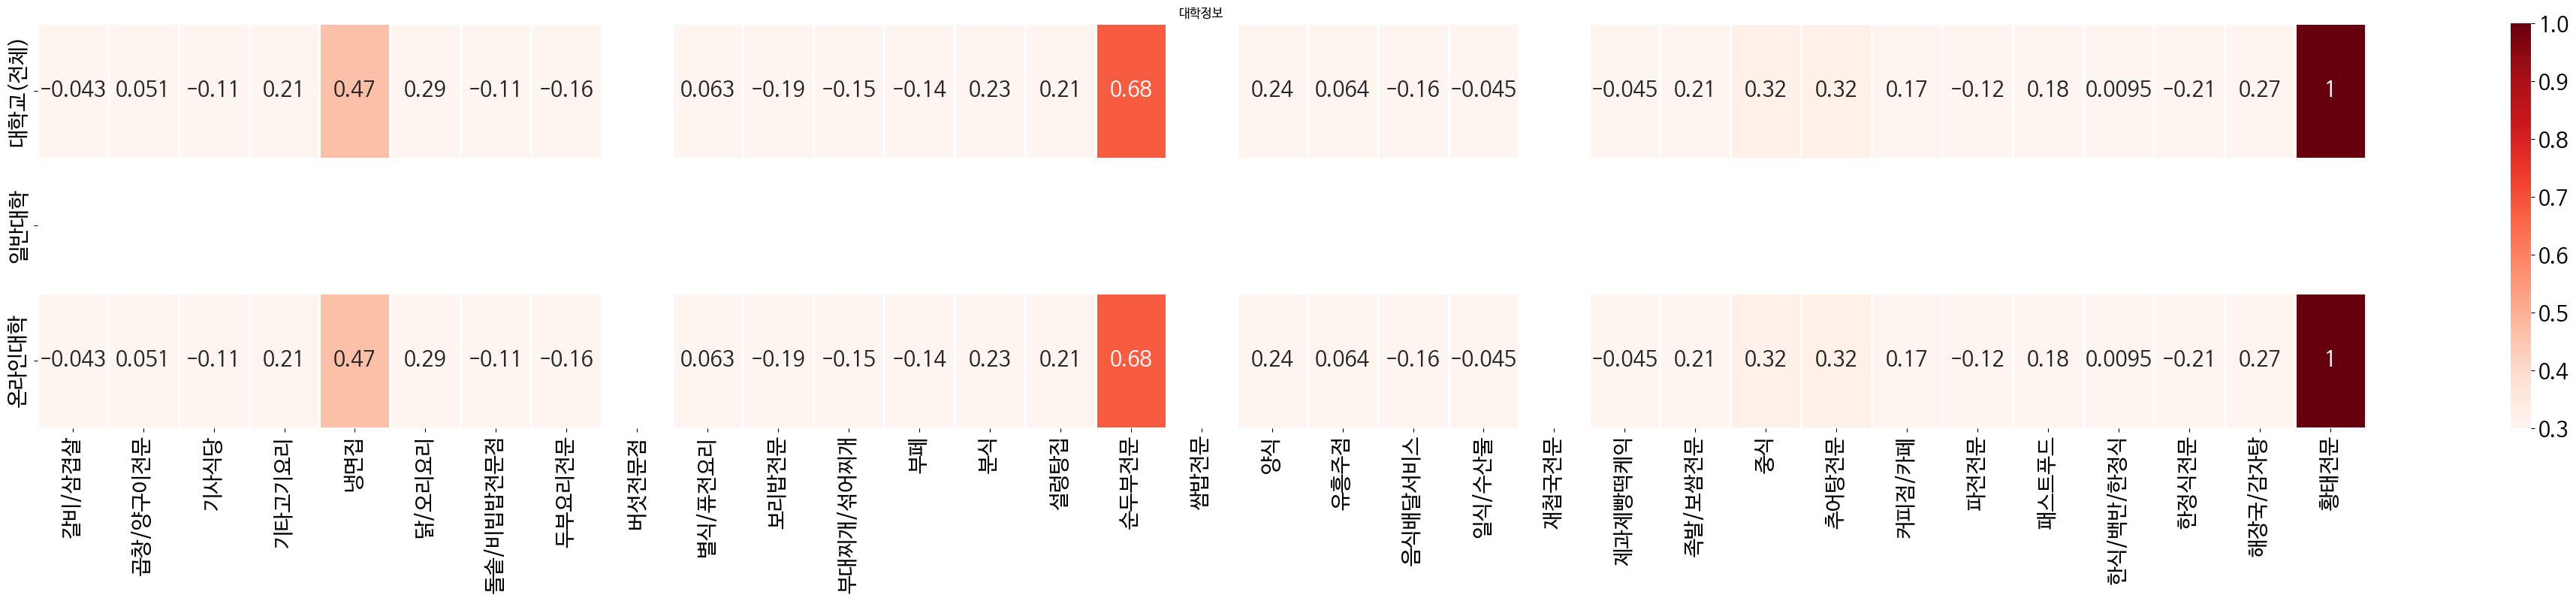

In [16]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(univ_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("대학정보")
plt.show()

In [17]:
result_univ.groupby('업종')['변수'].count()

업종
냉면집      2
순두부전문    2
중식       2
추어탕전문    2
황태전문     2
Name: 변수, dtype: int64

- 대학정보 데이터의 전체 변수 개수: **3개**
- 대학정보 데이터의 경우 변수들과의 상관계수가 0.3 이상인 업종은 **냉면집, 순두부전문, 중식, 추어탕전문, 황태전문점**이다.
- 대학가 주변에는 해당 업종들이 많이 분포하고 있다고 해석할 수 있다.
    - 하지만, 강북구에 존재하는 대학의 수는 **1개**이기 때문에, 대학 수가 업종들의 업소 수와 강한 상관관계가 있다고 단정짓기는 힘들다.

### **c) 초중고학교정보**

In [18]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,1,9,32,0,0,0,4,2,1,1
1,강북구,미아동,7,5,0,3,3,25,0,0,...,0,16,76,0,5,1,2,0,1,1
2,강북구,송중동,24,12,0,4,0,25,1,1,...,0,27,124,0,5,0,4,2,1,1
3,강북구,송천동,9,9,0,1,1,22,0,0,...,1,13,108,2,3,0,6,2,2,2
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,0,8,28,0,1,0,3,1,1,1


In [19]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),0.163747,0.087812,-0.302888,0.011871,-0.477394,-0.131216,-1.919714e-01,-0.199585,NaN,0.093191,...,0.120950,0.236263,0.099007,-0.044336,0.602084,0.204435,0.034270,0.524742,-1.696143e-01,-1.051903e-01
초등학교,0.091767,-0.006603,-0.235790,-0.174968,-0.473599,-0.379681,-2.357896e-01,-0.045964,NaN,-0.218152,...,-0.202577,0.048928,0.012580,-0.205644,0.429394,0.159316,-0.174283,0.335827,-2.343706e-01,-3.391511e-01
중학교,0.147855,0.035465,-0.337691,0.234923,-0.447214,0.047792,-4.686401e-18,-0.329140,NaN,0.347145,...,0.386834,0.289956,0.135124,0.220447,0.640588,0.079133,0.313236,0.655856,2.866584e-17,-1.444446e-17
고등학교,0.174051,0.212319,-0.170367,0.079013,-0.195538,0.157527,-1.703666e-01,-0.177123,NaN,0.259786,...,0.276476,0.304758,0.127252,-0.013643,0.422288,0.244861,0.069175,0.338235,-1.128942e-01,2.100420e-01


In [20]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,기사식당,초중고(전체),-0.302888
1,기사식당,중학교,-0.337691
2,냉면집,중학교,-0.447214
3,냉면집,초등학교,-0.473599
4,냉면집,초중고(전체),-0.477394
5,닭/오리요리,초등학교,-0.379681
6,두부요리전문,중학교,-0.329140
7,별식/퓨전요리,중학교,0.347145
8,분식,중학교,0.388290
9,설렁탕집,고등학교,0.617647


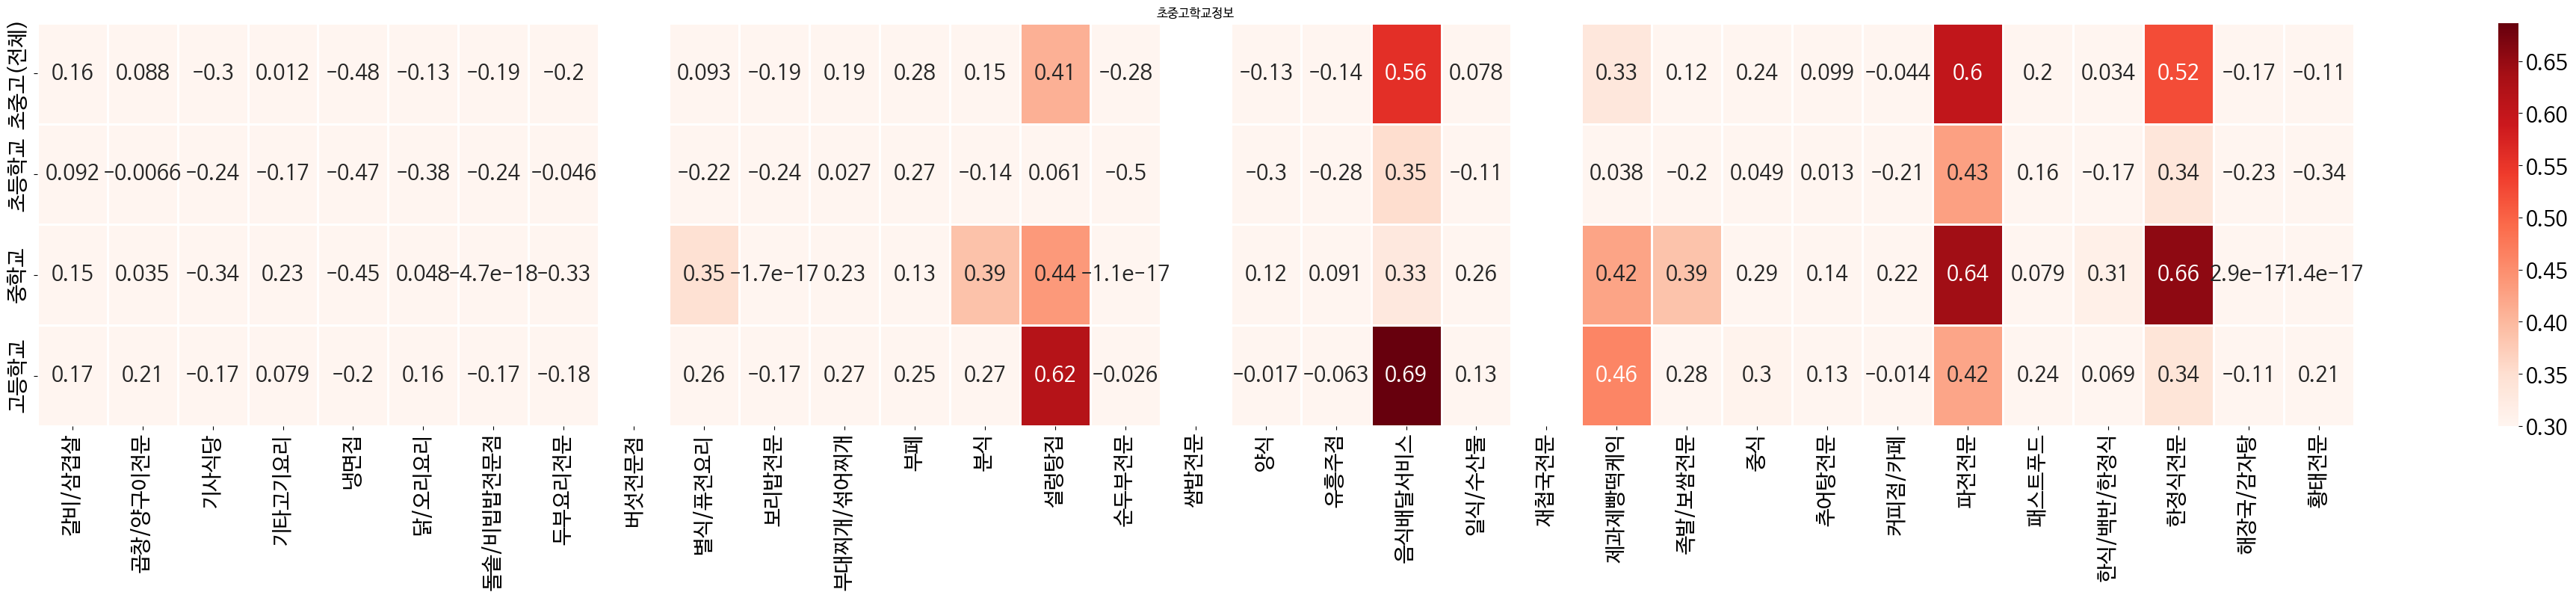

In [21]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

In [22]:
result_school.groupby('업종')['변수'].count()

업종
기사식당         2
냉면집          3
닭/오리요리       1
두부요리전문       1
별식/퓨전요리      1
분식           1
설렁탕집         3
순두부전문        1
양식           1
음식배달서비스      4
제과제빵떡케익      3
족발/보쌈전문      1
중식           1
파전전문         4
한식/백반/한정식    1
한정식전문        4
황태전문         1
Name: 변수, dtype: int64

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **강북구**에서는 초중고학교정보 데이터는 각 업종의 업소 수와 상당히 강한 상관관계가 있다고 할 수 있다.

### **d) 소득정보**

In [23]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,1,9,32,0,0,0,23494,9916,2.37,3467.21
1,강북구,미아동,7,5,0,3,3,25,0,0,...,0,16,76,0,5,1,22156,10841,2.04,3467.21
2,강북구,송중동,24,12,0,4,0,25,1,1,...,0,27,124,0,5,0,29719,13027,2.28,3467.21
3,강북구,송천동,9,9,0,1,1,22,0,0,...,1,13,108,2,3,0,26986,12233,2.21,3467.21
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,0,8,28,0,1,0,30954,11062,2.80,3467.21


In [24]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,0.456746,0.280498,-0.192582,0.079568,-0.288426,0.002231,0.125174,0.001301,NaN,0.199284,...,0.120583,0.475612,0.326174,0.265866,-0.089051,0.326638,0.275140,0.137152,-0.124506,-0.052706
총가구수,0.632253,0.560812,-0.237126,0.412011,-0.051789,0.303472,0.373471,0.084430,NaN,0.503439,...,0.477943,0.793577,0.650677,0.589228,-0.057682,0.565066,0.575884,0.228285,0.169779,0.103452
가구당인구수,-0.250873,-0.488140,0.055317,-0.612400,-0.482058,-0.546957,-0.428539,-0.191704,NaN,-0.533383,...,-0.656753,-0.523942,-0.590532,-0.566282,-0.088612,-0.435055,-0.506641,-0.162702,-0.592271,-0.319950
평균소득금액,-0.158363,-0.219031,0.316796,-0.112932,0.123040,-0.144888,0.119595,0.043028,NaN,-0.088342,...,-0.115915,-0.351275,-0.279027,0.045750,0.061304,-0.333135,0.063796,0.095627,0.077091,-0.363705


In [25]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,총가구수,0.632253
1,갈비/삼겹살,총인구수,0.456746
2,곱창/양구이전문,총가구수,0.560812
3,곱창/양구이전문,가구당인구수,-0.488140
4,기사식당,평균소득금액,0.316796
5,기타고기요리,총가구수,0.412011
6,기타고기요리,가구당인구수,-0.612400
7,냉면집,가구당인구수,-0.482058
8,닭/오리요리,총가구수,0.303472
9,닭/오리요리,가구당인구수,-0.546957


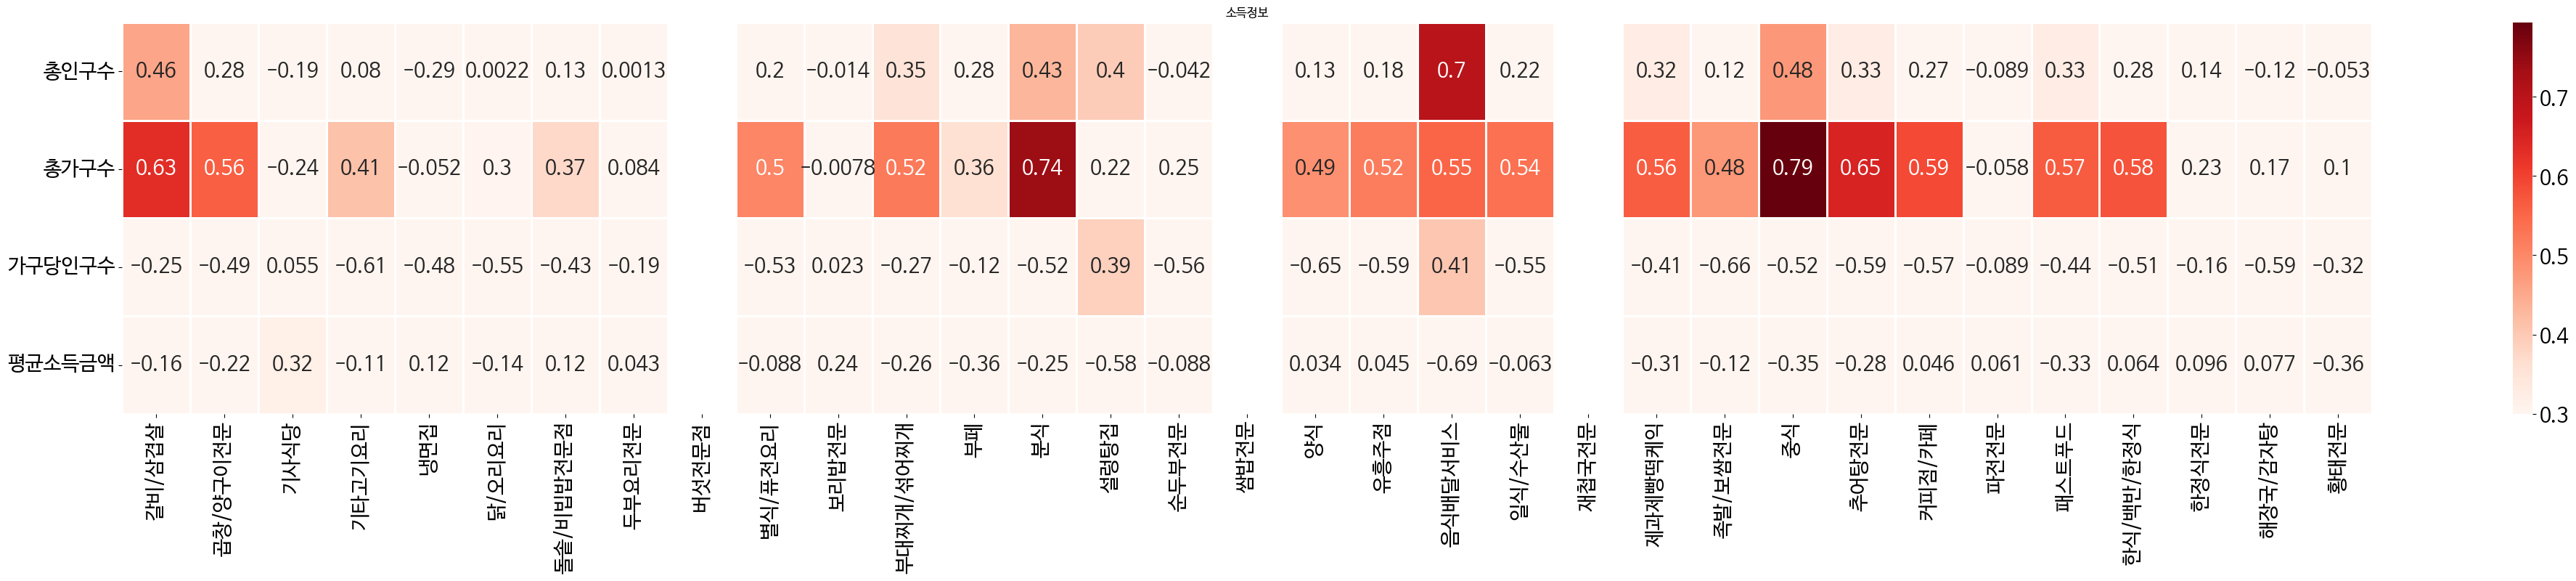

In [26]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [27]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     2
기사식당         1
기타고기요리       2
냉면집          1
닭/오리요리       2
돌솥/비빕밥전문점    2
별식/퓨전요리      2
부대찌개/섞어찌개    2
부페           2
분식           3
설렁탕집         3
순두부전문        1
양식           2
유흥주점         2
음식배달서비스      4
일식/수산물       2
제과제빵떡케익      4
족발/보쌈전문      2
중식           4
추어탕전문        3
커피점/카페       2
패스트푸드        4
한식/백반/한정식    2
해장국/감자탕      1
황태전문         2
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강북구**에서 소득정보 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **e) 상권변화지표**

In [28]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,10,1,9,32,0,0,0,HL,126.0,55.0
1,강북구,미아동,7,5,0,3,3,25,0,0,...,39,0,16,76,0,5,1,LL,114.0,50.0
2,강북구,송중동,24,12,0,4,0,25,1,1,...,51,0,27,124,0,5,0,LL,111.0,53.0
3,강북구,송천동,9,9,0,1,1,22,0,0,...,34,1,13,108,2,3,0,HH,127.0,56.0
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,13,0,8,28,0,1,0,LL,102.0,51.0


In [29]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,-0.273177,-0.157601,-0.155556,-0.025934,-0.105023,-0.051705,-0.168773,-0.362693,NaN,-0.077343,...,0.025331,-0.076387,-0.218059,-0.262193,0.550054,-0.223360,-0.141141,0.356749,-0.222330,-0.068941
폐업점포영업개월,0.008000,-0.205951,0.246653,-0.242910,-0.471828,0.009481,-0.307555,-0.160272,NaN,-0.099389,...,-0.173540,-0.186294,-0.463018,-0.249835,0.445943,-0.330386,-0.056918,0.350905,-0.499418,-0.328497


In [30]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,냉면집,폐업점포영업개월,-0.471828
1,돌솥/비빕밥전문점,폐업점포영업개월,-0.307555
2,두부요리전문,운영점포영업개월,-0.362693
3,순두부전문,폐업점포영업개월,-0.485223
4,양식,폐업점포영업개월,-0.340744
5,유흥주점,폐업점포영업개월,-0.345517
6,추어탕전문,폐업점포영업개월,-0.463018
7,파전전문,운영점포영업개월,0.550054
8,파전전문,폐업점포영업개월,0.445943
9,패스트푸드,폐업점포영업개월,-0.330386


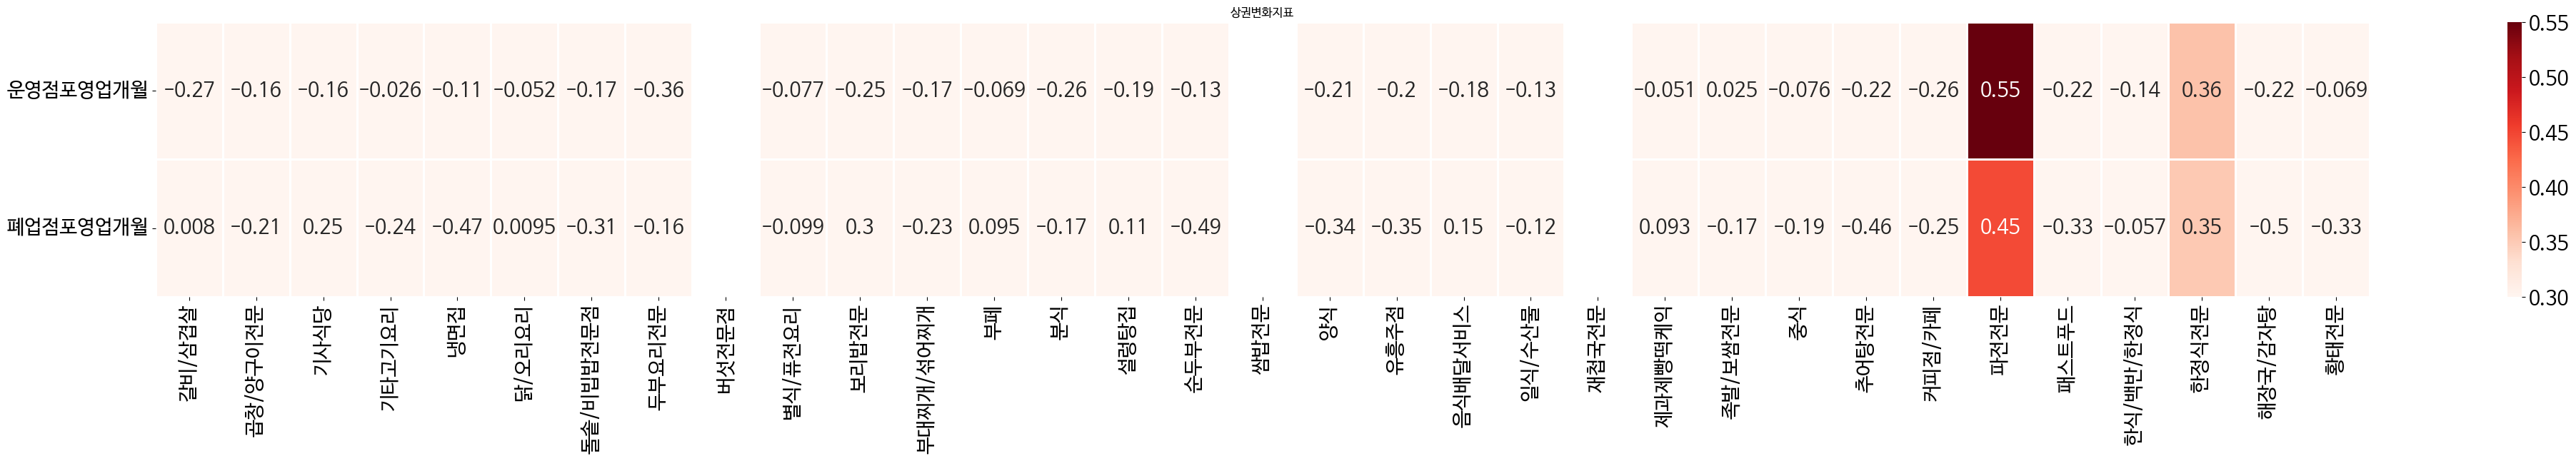

In [31]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

In [32]:
result_change.groupby('업종')['변수'].count()

업종
냉면집          1
돌솥/비빕밥전문점    1
두부요리전문       1
순두부전문        1
양식           1
유흥주점         1
추어탕전문        1
파전전문         2
패스트푸드        1
한정식전문        2
해장국/감자탕      1
황태전문         1
Name: 변수, dtype: int64

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상이다.  
- 서울시 전체와 다르게 **강북구**에서는 상권변화지표 데이터는 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **f) 주민등록인구**

In [33]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,0,0,0,1116,1747,5790,7569,3773,3298,23293
1,강북구,미아동,7,5,0,3,3,25,0,0,...,0,5,1,675,1269,6722,6508,3500,3094,21768
2,강북구,송중동,24,12,0,4,0,25,1,1,...,0,5,0,1450,1948,8281,9566,4708,4051,30004
3,강북구,송천동,9,9,0,1,1,22,0,0,...,2,3,0,908,1437,6505,8384,4694,4179,26107
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,0,1,0,2505,3863,6628,11270,3557,3085,30908


In [34]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,0.112143,-0.109265,-0.081275,-0.228731,-0.409476,-0.316182,-0.104829,-0.028452,NaN,-0.140370,...,-0.258218,-0.055896,-0.107507,-0.174390,-0.107825,0.019664,-0.155220,-0.154220,-0.325101,-0.198029
10대,0.014489,-0.167941,-0.132251,-0.249910,-0.385649,-0.354457,-0.137059,-0.108013,NaN,-0.158921,...,-0.262078,-0.080777,-0.125700,-0.212265,-0.110394,-0.022990,-0.200695,-0.147418,-0.342616,-0.115945
20 ~ 30대,0.715230,0.601103,-0.161951,0.624034,0.034199,0.455500,0.545648,0.184926,NaN,0.644153,...,0.606313,0.855484,0.726799,0.722370,-0.035592,0.647331,0.702274,0.084638,0.313691,0.136073
40 ~ 50대,0.375486,0.195823,-0.162570,0.011059,-0.338640,-0.065384,0.081826,0.010192,NaN,0.147949,...,0.041502,0.335802,0.210789,0.152187,-0.096976,0.262915,0.175906,0.061554,-0.176262,-0.121926
60대,0.560549,0.380637,-0.078662,0.116903,-0.222552,0.173422,0.113785,0.013906,NaN,0.243265,...,0.184384,0.599318,0.357779,0.387790,0.007331,0.319573,0.423072,0.348238,-0.109835,-0.051501
70대 이상,0.396414,0.237066,-0.039363,-0.141907,-0.158788,-0.022917,-0.004990,-0.065649,NaN,-0.025461,...,-0.053367,0.351383,0.149867,0.213358,-0.102414,0.066308,0.237724,0.331514,-0.193717,-0.164252
총인구,0.498950,0.300219,-0.154013,0.126295,-0.271975,0.046254,0.175881,0.032840,NaN,0.240195,...,0.148712,0.493836,0.335302,0.304151,-0.085984,0.344465,0.319317,0.103282,-0.100526,-0.071776


In [35]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.715230
1,갈비/삼겹살,60대,0.560549
2,갈비/삼겹살,총인구,0.498950
3,갈비/삼겹살,70대 이상,0.396414
4,갈비/삼겹살,40 ~ 50대,0.375486
...,...,...,...
62,한정식전문,60대,0.348238
63,한정식전문,70대 이상,0.331514
64,해장국/감자탕,20 ~ 30대,0.313691
65,해장국/감자탕,10대 미만,-0.325101


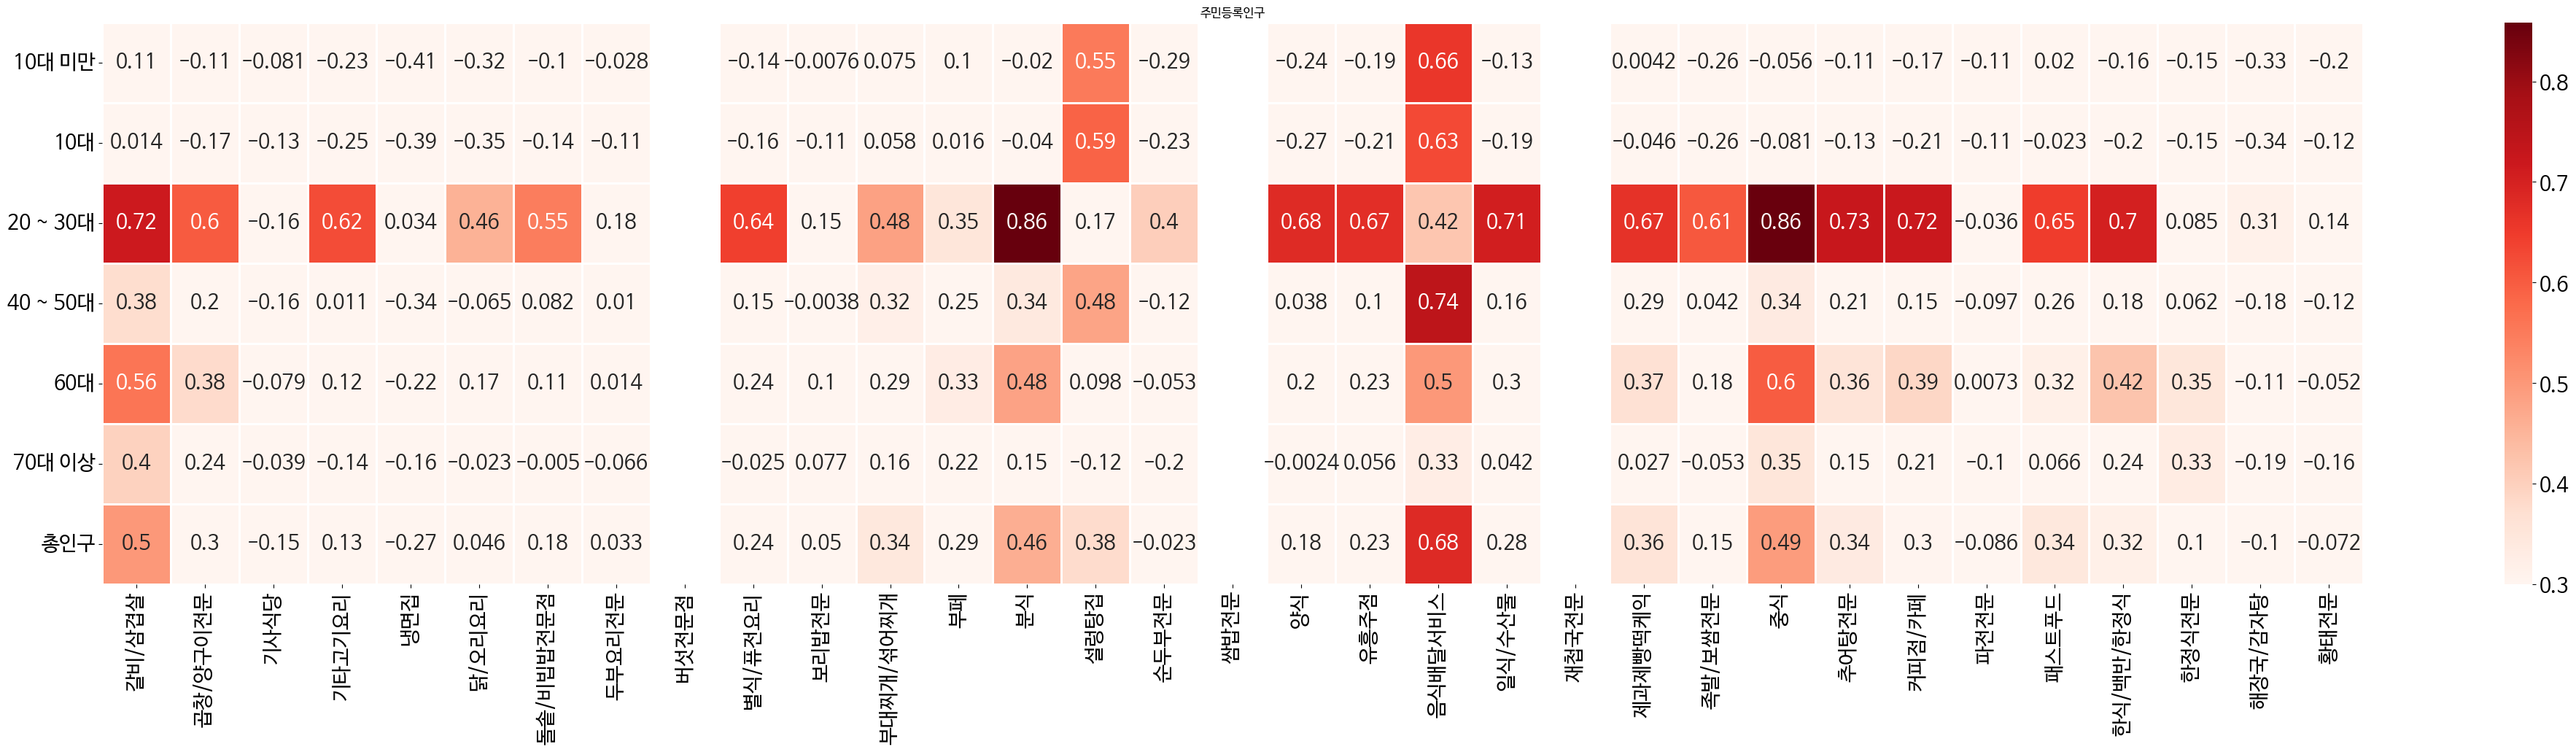

In [36]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [37]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       5
곱창/양구이전문     3
기타고기요리       1
냉면집          3
닭/오리요리       3
돌솥/비빕밥전문점    1
별식/퓨전요리      1
부대찌개/섞어찌개    3
부페           2
분식           4
설렁탕집         4
순두부전문        1
양식           1
유흥주점         1
음식배달서비스      7
일식/수산물       1
제과제빵떡케익      3
족발/보쌈전문      1
중식           5
추어탕전문        3
커피점/카페       3
패스트푸드        3
한식/백반/한정식    3
한정식전문        2
해장국/감자탕      3
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강북구**에서의 주민등록인구 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **g) 지하철**

In [38]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,강북구,삼양동,2,0,0,2,0,15,0,0,...,0,10,1,9,32,0,0,0,3,0
1,강북구,미아동,7,5,0,3,3,25,0,0,...,2,39,0,16,76,0,5,1,1,0
2,강북구,송중동,24,12,0,4,0,25,1,1,...,3,51,0,27,124,0,5,0,1,0
3,강북구,송천동,9,9,0,1,1,22,0,0,...,1,34,1,13,108,2,3,0,0,0
4,강북구,삼각산동,4,1,0,0,0,5,0,0,...,0,13,0,8,28,0,1,0,0,0


In [39]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.062497,-0.199057,0.05616,0.354878,-0.120858,0.411315,0.05616,-0.095792,NaN,0.084794,...,-0.082426,0.108498,-0.168539,0.129049,0.133167,-0.102815,0.218692,-0.127252,0.034889,0.043274
역(환승역),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,기타고기요리,역(전체),0.354878
1,닭/오리요리,역(전체),0.411315
2,보리밥전문,역(전체),0.587133
3,부대찌개/섞어찌개,역(전체),-0.418839
4,설렁탕집,역(전체),-0.345397


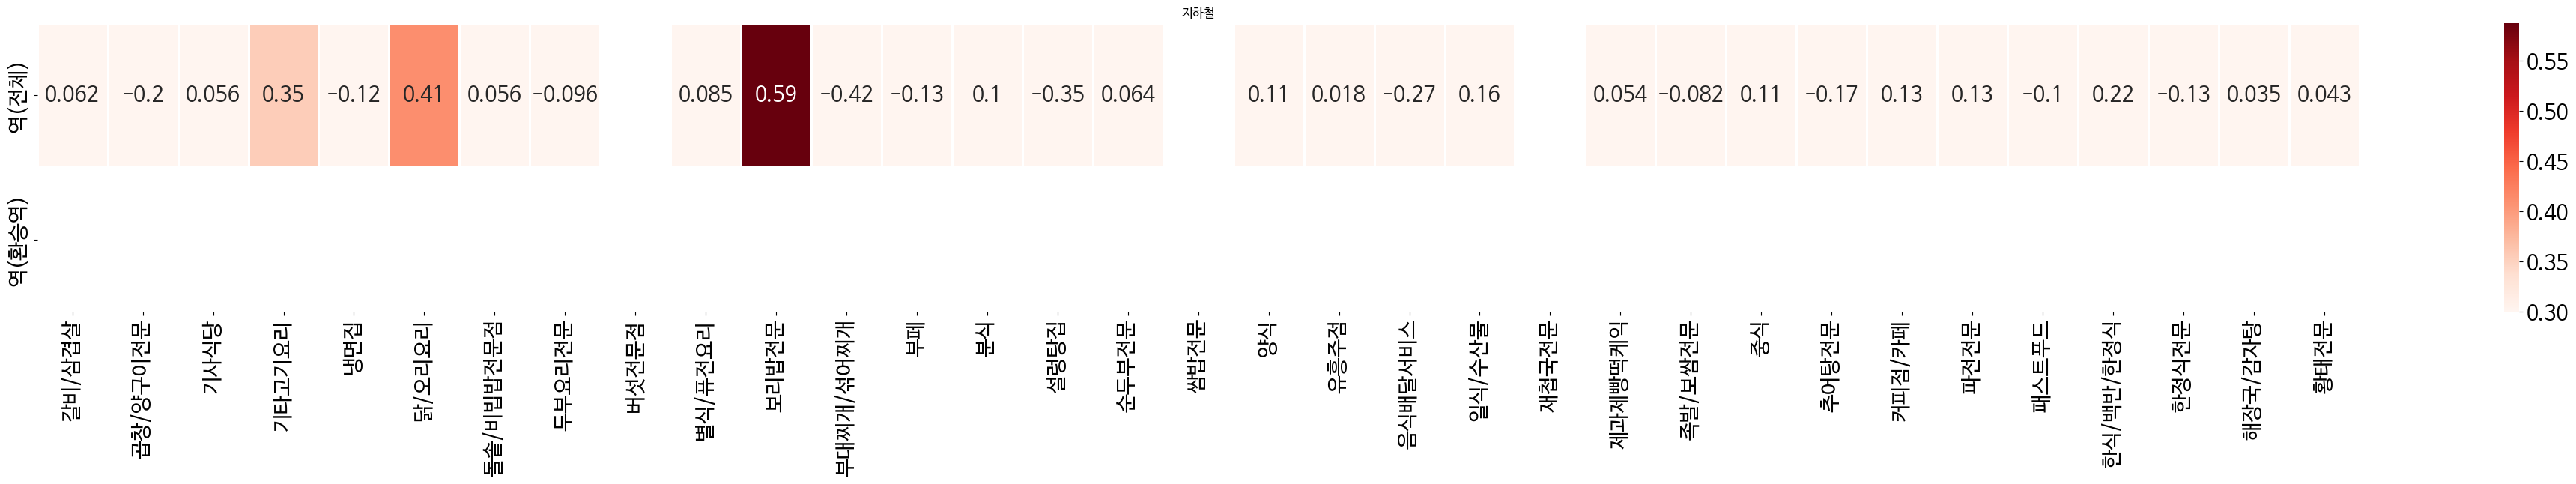

In [41]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

- 강북구의 경우 환승역이 존재하지 않는다.

In [42]:
result_subway.groupby('업종')['변수'].count()

업종
기타고기요리       1
닭/오리요리       1
보리밥전문        1
부대찌개/섞어찌개    1
설렁탕집         1
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 일부 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **강북구**에서의 지하철 데이터가 각 업종별 업소 수와 상관관계가 더 작다고 할 수 있다.